<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z12_G_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

# Transfer learning

<br>

<img src="https://github.com/mladbago/podstawy_sztucznej_inteligencji/blob/main/Grafika/transfer_learning.png?raw=1" width="550">

**Transfer learning** (transfer "wiedzy") - wykorzystanie nauczonych przez kogoś sieci do naszego problemu. Możliwe dzięki temu, że cechy wykrywane przez sieci w głębokich warstwach mogą być uniwersalne i przydatne w różnych problemach.

### VGG16

In [3]:
from keras.applications import VGG16, InceptionV3
base_model = VGG16(weights='imagenet',include_top=False)
base_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

### InceptionV3

In [4]:
inc = InceptionV3()
inc.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

# Zad
Trzeba nadać wymiar wejści anaszej sieci
```python
h,w = 150, 150
```

In [5]:
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
len(model.layers)

19

# Zad
Zbudujmy siec z
* VGG16 dla wejścia h,w = 150, 150
* Flatten
* Dense
* Dense

In [8]:
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)

model_transfer.layers[0].trainable = False

model_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 sequential (Sequential)     (None, 1)                 2097665   
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# model.summary()
# top_model.summary()

# Zad
Naucz model

* użyj Image Augmentation

In [9]:
from keras.preprocessing.image import ImageDataGenerator

model_transfer.compile(loss='binary_crossentropy',optimizer="sgd",metrics=['accuracy'])

train_data_dir = r'C:\j_python\bootcamp_deep_learning\Dane\data\train'
validation_data_dir = r'C:\j_python\bootcamp_deep_learning\Dane\data\validation'
nb_validation_samples = 200
nb_train_samples = 50
epochs = 50
batch_size = 10

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(h, w),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(h, w),
                                                        batch_size=batch_size,
                                                        class_mode='binary')


FileNotFoundError: ignored

In [ ]:
nb_validation_samples//batch_size

20

In [ ]:
history_tr_ag = History()
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model_transfer.fit_generator(train_generator, samples_per_epoch=batch_size, epochs=epochs,
                    validation_data=validation_generator, nb_val_samples=10, callbacks=[early_stopping, history_tr_ag])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=50, validation_data=<keras.pre..., callbacks=[<keras.ca..., steps_per_epoch=1, validation_steps=10)`
  after removing the cwd from sys.path.


Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.4168 - accuracy: 0.9000 - val_loss: 0.5323 - val_accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 8s 8s/step - loss: 0.5300 - accuracy: 0.8000 - val_loss: 0.5194 - val_accuracy: 0.8000
Epoch 3/50
1/1 [==============================] - 8s 8s/step - loss: 0.5965 - accuracy: 0.7000 - val_loss: 0.5356 - val_accuracy: 0.8000
Epoch 4/50
1/1 [==============================] - 8s 8s/step - loss: 0.3608 - accuracy: 1.0000 - val_loss: 0.6014 - val_accuracy: 0.6000
Epoch 5/50
1/1 [==============================] - 8s 8s/step - loss: 0.6751 - accuracy: 0.5000 - val_loss: 0.5457 - val_accuracy: 0.7000
Epoch 6/50
1/1 [==============================] - 8s 8s/step - loss: 0.6591 - accuracy: 0.5000 - val_loss: 0.5119 - val_accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 8s 8s/step - loss: 0.4183 - accuracy: 1.0000 - val_loss: 0.5484 - val_accuracy: 0.7000
Epoch 8/50
1/1 [=========================

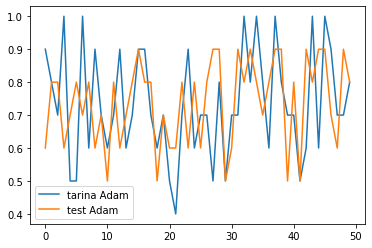

In [ ]:
plt.plot(history_tr_ag.history['accuracy'], label = "tarina Adam")
plt.plot(history_tr_ag.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Zad
Wykonaj zadania na większym zbiorze danych.

https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History
from keras.applications import VGG16, InceptionV3
base_model = VGG16(weights='imagenet',include_top=False)
base_model.summary()
inc = InceptionV3()
inc.summary()
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))
model.summary()
len(model.layers)
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)

model_transfer.layers[0].trainable = False

model_transfer.summary()

from keras.preprocessing.image import ImageDataGenerator

model_transfer.compile(loss='binary_crossentropy',optimizer="sgd",metrics=['accuracy'])

train_data_dir = r'dir'
validation_data_dir = r'dir'
nb_validation_samples = 200
nb_train_samples = 50
epochs = 50
batch_size = 10

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(h, w),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(h, w),
                                                        batch_size=batch_size,
                                                        class_mode='binary')